---

## CARGAR DATOS

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as st

In [129]:
df_games_data = pd.read_csv('datasets/games.csv') #Se carga la info usando pd.read_csv

In [130]:
df_games_data.info() #Se evalua en terminos generales los tipos de informacion y los nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## PREPARAR DATOS

In [131]:
df_games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Se encuentra que los titulos estan en mayuscula por lo cual usando un ciclo for se van a dejar en minuscula.

In [132]:
new_columns =[] #lista para agregar los titulos en minuscula 

for columns in df_games_data.columns: # Para cada columna de las columnas
    columns = columns.lower() #Minuscula cada titulo de las columnas
    new_columns.append(columns) #Se agregan a la lista nueva
    
df_games_data.columns = new_columns #Se reemplazan los titulos a minuscula

df_games_data.info() #Se confirma



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [133]:
df_games_data.sample(5) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8789,WordJong,DS,2007.0,Puzzle,0.13,0.01,0.0,0.01,77.0,7.7,E
8808,Zoids: Battle Legends,GC,2003.0,Action,0.12,0.03,0.0,0.00,NaN,8.1,T
4563,"Barbie: Jet, Set & Style!",DS,2011.0,Misc,0.34,0.05,0.0,0.03,NaN,NaN,NaN
3810,NASCAR 2000,N64,1999.0,Racing,0.49,0.03,0.0,0.00,NaN,NaN,NaN
3179,Dragon Age II,PC,2011.0,Action,0.23,0.33,0.0,0.08,82.0,4.5,M


Evaluando la funcion de cada columna se decide cambiar el tipo de 'year_of_release' de float a int dado que los años no pueden ser decimales . Pero antes vamos a eliminar los valores nulos , repetidos y faltantes.

In [134]:
df_games_data.duplicated().sum()

0

Analizando como esta conformada la informacion se decide analizar los duplicados en todo el dataframe dado que se pueden repetir los datos si uno los evalua en columnas especificas en vista que los juegos o las plataformas se pueden repetir , sinmebargo se confirma que no hay filas en donde al 100% de los datos sean iguales.

### Nombre

In [135]:
df_games_data['name'].describe()

count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

In [136]:
df_games_data[df_games_data['name']=='Need for Speed: Most Wanted'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [137]:
df_games_data[df_games_data['name'].isna()] #se van a eliminar estas filas dado que les falta info importante

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [138]:
df_games_data = df_games_data.dropna(subset=['name']).reset_index(drop =True)
df_games_data['name'].isnull().sum()


0

In [139]:
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se eliminan los valores vacios de la columna Name haciendo uso de la funcion .dropna(subset=['']) y se resetea la indexacion esto para que no hayan saltos de linea mas adelante y para que el df nuevo este bien numerado para esto se usa .reset_index(drop=True) , se evaluan los demas duplicados encontrando que los nombres de los videojuegos se repiten , dado que hay versiones según la consola , por ultimo se define que el tipo objetc de esta columna es el acertado.


### Plataforma

In [140]:
df_games_data['platform'].describe()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

Se evalua y se encuentra que no hay valores faltantes en cuanto a el tipo de dato es el correcto.

### Año de lanzamiento

In [141]:
df_games_data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [142]:
df_games_data[df_games_data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Se encuentra un error clave los valores faltantes de la columna se encuentra que cuando hacer falta el año de lanzamiento , es por que el nombre del juego de alguna manera se guardo como su valor de indexacion , por tanto se van a eliminar estos datos ya que son atipicos y generaran errores de dejarse de esta manera.

In [143]:
df_games_data = df_games_data.dropna(subset=['year_of_release']).reset_index(drop = True)

In [144]:
df_games_data['year_of_release'].isna().sum()


0

In [145]:
df_games_data['year_of_release'] = df_games_data['year_of_release'].astype(int)

In [146]:
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [147]:
df_games_data['year_of_release'].astype(object)

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16439    2016
16440    2006
16441    2016
16442    2003
16443    2016
Name: year_of_release, Length: 16444, dtype: object

Se verifican los cambios encontrando que se eliminarlos las filas con valor nulo y que el type de la columna paso de float a object lo cual es necesario ya que es un  tipo de dato object

###  Genero


In [148]:
df_games_data['genre'].describe()

count      16444
unique        12
top       Action
freq        3307
Name: genre, dtype: object

In [149]:
df_games_data['genre']= [genre.lower() for genre in df_games_data['genre']]
df_games_data['genre']

0              sports
1            platform
2              racing
3              sports
4        role-playing
             ...     
16439          action
16440          sports
16441       adventure
16442        platform
16443      simulation
Name: genre, Length: 16444, dtype: object

Se colocan todos los generos en minuscula esto con el fin de evitar errores a la hora de analizar la reiteracion de los generos

In [150]:
print('El numero de valores nulos de la columna genero es de :' , df_games_data['genre'].isna().sum())

El numero de valores nulos de la columna genero es de : 0


Se evalua usando el metodo isna () junro .sum() con el fin de determinar la existencia o no de valores nulos .

### Ventas

In [151]:
df_games_data['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [152]:
df_games_data['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [153]:
df_games_data['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [154]:
df_games_data['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Lo que se verifica en este punto es que no hayan valores nulos , y que los precios sena positivos , ademas se verifica que el tipo de datos sea float como todos cumplen no hay necesidad de realizar cambios.

### Puntajes

In [155]:
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


#### Critic score

In [156]:
df_games_data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [157]:
median_critics = df_games_data['critic_score'].median()

In [158]:
df_games_data['critic_score'].sample(5)

15397     NaN
2702     81.0
4435     81.0
13058    66.0
10997     NaN
Name: critic_score, dtype: float64

Los valores se encuentran en orden dado que estan entre los rangos de calificacion ,se va a pasar a int pero antes es necesario manejar los Nan para esto se tomo la decision de volver los Nan la media de las calificaciones esto dado que cuando vayamos a hacer analisis mas especificos por genero 

In [159]:
df_games_data['critic_score'] = df_games_data['critic_score'].fillna(median_critics).astype(int)
df_games_data['critic_score'].sample(5)

12052    64
16226    71
5902     71
6814     71
6820     71
Name: critic_score, dtype: int32

In [160]:
nonull = round((7983/16444)*100 , 2)
print("Porcentaje de valores validos :  %",nonull)

Porcentaje de valores validos :  % 48.55


Se opta por usar la mediana en vez de la mediana dado que el total de filas es de 16444 mientras que tengo solo 7983  lo cual es el 48.55% nisiquiera la mitad por lo cual la dispersion de los datos podria afectar la muestra si uso el promedio.

#### User score

In [161]:
df_games_data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

In [162]:
df_games_data['user_score_1'] = df_games_data['user_score'].replace('tbd',-1)

df_games_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1
15078,Dungeon Defenders,PC,2011,role-playing,0.02,0.00,0.00,0.00,81,7.3,E10+,7.3
2047,Road & Track Presents: The Need for Speed,PS,1995,racing,0.56,0.38,0.00,0.07,71,NaN,NaN,NaN
7272,Shadow of Destiny,PS2,2001,adventure,0.09,0.07,0.03,0.02,78,8.2,T,8.2
969,Professor Layton and the Mask of Miracle,3DS,2011,puzzle,0.32,0.97,0.36,0.13,71,NaN,NaN,NaN
761,Super Mario RPG: Legend of the Seven Stars,SNES,1996,role-playing,0.66,0.00,1.45,0.03,71,NaN,NaN,NaN


In [163]:
cantidad_nonull = round((9839 / 16444)*100,2)
print("Porcentaje de valores validos :  %",cantidad_nonull)

Porcentaje de valores validos :  % 59.83


In [164]:
df_games_data['user_score_1'] = df_games_data['user_score_1'].astype(float)

In [165]:
df_games_data[df_games_data['user_score_1']>0]['user_score_1'].mean()

7.127284910211739

In [166]:
median =df_games_data[df_games_data['user_score_1']>0]['user_score_1'].median()
median

7.5

In [167]:
df_games_data['user_score'] = df_games_data['user_score_1'].fillna(median)

In [168]:
df_games_data['user_score'] = df_games_data['user_score'].replace(-1 , median).astype(int)

In [169]:
df_games_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_1
6817,Pro Evolution Soccer 2014,X360,2013,action,0.07,0.15,0.00,0.02,80,4,E,4.3
13951,Even in a Game Listen to Me Girls. I Am Your F...,PSP,2012,action,0.00,0.00,0.03,0.00,71,7,NaN,NaN
16203,Myst,PSP,2006,adventure,0.00,0.01,0.00,0.00,69,4,E,4.8
10447,Kelly Slater's Pro Surfer,XB,2002,sports,0.08,0.02,0.00,0.00,80,8,E,8.0
4910,Jam Sessions: Sing and Play Guitar (US sales),DS,2007,misc,0.38,0.00,0.00,0.00,71,7,NaN,NaN
9424,Hyperdevotion Noire: Goddess Black Heart,PSV,2014,role-playing,0.04,0.01,0.06,0.02,68,7,T,7.1
1754,Tak and the Power of Juju,PS2,2003,platform,0.56,0.44,0.00,0.15,68,9,E,9.0
7462,MDK,PS,1997,shooter,0.11,0.08,0.00,0.01,71,7,NaN,NaN
14543,101-in-1 Sports Party Megamix,Wii,2010,sports,0.02,0.00,0.00,0.00,41,7,E10+,-1.0
1384,Toy Story 3: The Video Game,Wii,2010,action,0.63,0.62,0.00,0.14,71,7,NaN,NaN


In [170]:
df_games_data = df_games_data.drop(columns=['user_score_1'])
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  int32  
 10  rating           9768 non-null   object 
dtypes: float64(4), int32(3), object(4)
memory usage: 1.2+ MB


Lo primero es que es necesario cambiar el tipo de datos a int antes de esto es necesario ver como manejar los datos tbd , las siglas de esta fila indican que falta determinarlas esto puede darse dado que aun no han cargado por lo cual se decide cambiar estos valores remplzanadose en otra colomna por 0 con el fin de poder encontrar la media de los datos para ahi si remplazar unicamente estos valores por unos promediados ya que son los que realmente si fueron calificados. Analizar el porcentaje de valores que rellene .

### Rating

In [171]:
df_games_data.sort_values(by='rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
864,Grand Theft Auto: San Andreas,XB,2005,action,1.26,0.61,0.00,0.09,93,8,AO
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8,E
13338,Shaun the Sheep,DS,2008,adventure,0.04,0.00,0.00,0.00,58,7,E
6367,The Adventures of Jimmy Neutron Boy Genius vs....,GBA,2002,action,0.19,0.07,0.00,0.00,55,7,E
6366,Major League Baseball 2K10,Wii,2010,sports,0.24,0.00,0.00,0.02,53,7,E
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,71,7,NaN
16440,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,71,7,NaN
16441,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,71,7,NaN
16442,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,71,7,NaN


In [172]:
df_games_data['rating'] = df_games_data['rating'].fillna('RP')

In [173]:
def rating_name(tipo):
    
    if tipo == 'AO':
        return 'Adultos +18'
            
    elif tipo == 'M':
        return 'Maduro +17'
            
    elif tipo == 'T':
        return 'Adolecentes +13'
    
    elif tipo == 'E10+' :
        return 'Todos +10'
    
    
    elif tipo == 'RP':
        return 'Pendiente'
    
    
    elif tipo == 'EC':
        return 'Niños +3'
    
    
    elif tipo == 'E' or 'K-A':
        return 'Todos'
    

    else:
        return 'error'


df_games_data['publico'] = df_games_data['rating'].apply(rating_name)

df_games_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico
13819,Tears to Tiara Anecdotes: The Secret of Avalon,PS3,2009,strategy,0.00,0.00,0.04,0.00,71,7,RP,Pendiente
5270,Dynasty Warriors 5 Empires,PS2,2006,action,0.11,0.09,0.12,0.03,62,9,T,Adolecentes +13
5077,Mini-Yonku GB: Let's & Go!!,GB,1997,strategy,0.00,0.00,0.37,0.00,71,7,RP,Pendiente
10763,Snood 2: On Vacation,DS,2005,puzzle,0.09,0.00,0.00,0.01,46,7,E,Todos
10038,Valkyrie Drive: Bhikkhuni,PSV,2015,action,0.00,0.03,0.07,0.01,72,8,M,Maduro +17


In [174]:
df_games_data.groupby('publico')['name'].count()

publico
Adolecentes +13    2905
Adultos +18           1
Maduro +17         1536
Niños +3              8
Pendiente          6677
Todos              3924
Todos +10          1393
Name: name, dtype: int64

In [175]:
df_games_data = df_games_data.round(0)
df_games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  int32  
 10  rating           16444 non-null  object 
 11  publico          16444 non-null  object 
dtypes: float64(4), int32(3), object(5)
memory usage: 1.3+ MB


In [176]:
nonulos = round ((9768/16444)*100 ,2)
print('Porcentaje de valores no nulos para el rating : %',nonulos )

Porcentaje de valores no nulos para el rating : % 59.4


En este caso se opto por manejar la nueva columna publico dado que se categorizaron todos los valores incluyendo los Nan ya uqe a estos les falta el registro de publico y esto hay que tenerlo en cuenta. Casi el 60% de los datos los tenemos pero no justifica el eliminar el 40% de las filas. Se homologan las clases K-A y E ya que son lo mismo y se reemplazan los Nan por RP que es pendiente.


In [177]:
df_games_data['total_ventas'] = df_games_data['na_sales'] + df_games_data['eu_sales'] + df_games_data['jp_sales'] 
+ df_games_data['other_sales']

#df_games_data[df_games_data['platform']=='Wii']
df_games_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
0,Wii Sports,Wii,2006,sports,41.0,29.0,4.0,8.0,76,8,E,Todos,74.0
1,Super Mario Bros.,NES,1985,platform,29.0,4.0,7.0,1.0,71,7,RP,Pendiente,40.0
2,Mario Kart Wii,Wii,2008,racing,16.0,13.0,4.0,3.0,82,8,E,Todos,33.0
3,Wii Sports Resort,Wii,2009,sports,16.0,11.0,3.0,3.0,80,8,E,Todos,30.0
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.0,9.0,10.0,1.0,71,7,RP,Pendiente,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,action,0.0,0.0,0.0,0.0,71,7,RP,Pendiente,0.0
16440,LMA Manager 2007,X360,2006,sports,0.0,0.0,0.0,0.0,71,7,RP,Pendiente,0.0
16441,Haitaka no Psychedelica,PSV,2016,adventure,0.0,0.0,0.0,0.0,71,7,RP,Pendiente,0.0
16442,Spirits & Spells,GBA,2003,platform,0.0,0.0,0.0,0.0,71,7,RP,Pendiente,0.0


## ANALIZAR DATOS

### Juegos lanzados por año

In [178]:
#Cuantos juegos fueron lanzados por cada año
juegos_año = df_games_data.groupby('year_of_release')['name'].count()

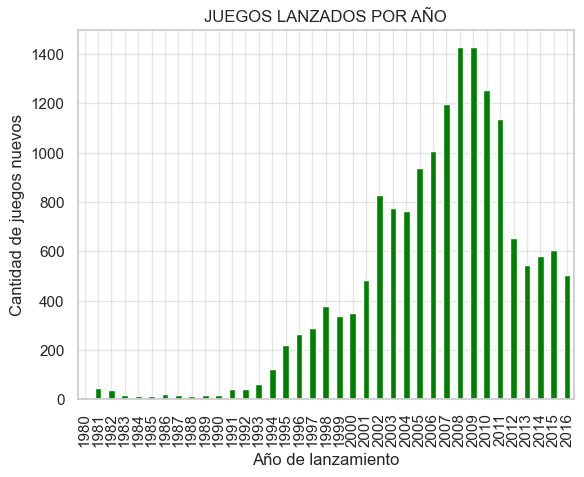

In [179]:
graph1 = juegos_año.plot(kind='bar' , title ='JUEGOS LANZADOS POR AÑO' , ylabel = 'Cantidad de juegos nuevos' , 
                        xlabel = 'Año de lanzamiento' , color =  'green' )
plt.grid(alpha=0.5)

El auge de los videojuegos inicia en los años 2000 como se aprecia en la grafica, con la llegada de la globalizacion y las nuevas tecnologias , lo que genero la posibilidad de comprar juegos desde cualquier parte del mundo ,su top llega hasta el 2010 mostrandonos como llegaron a salir hasta 1400 juegos nuevos , la tendencia se estabilizo pasando esta decada teniendo un promedio de 500 juegos nuevos por año.

### Cómo varían las ventas de una plataforma a otra

In [180]:
ganancias = df_games_data.groupby('platform')['total_ventas'].sum().sort_values(ascending = False)
ganancias_platform = ganancias.head(20) #hay 30 plataformas 
ganancias_platform.head(5)   #plataformas con las mayores ventas

platform
PS2     699.0
X360    674.0
Wii     607.0
PS3     541.0
DS      483.0
Name: total_ventas, dtype: float64

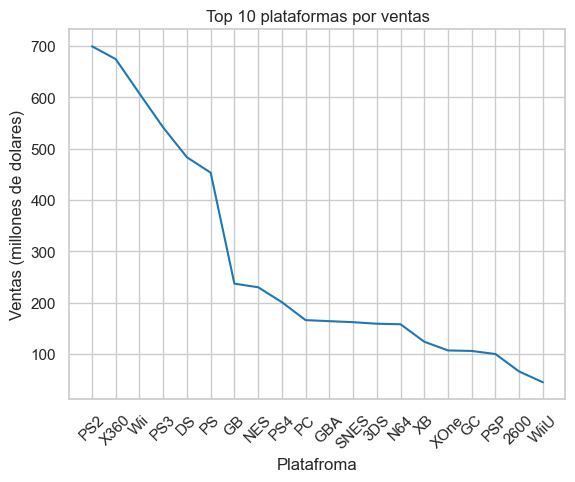

In [181]:
graph_sales_platform = sns.lineplot(data=ganancias_platform )
plt.title('Top 10 plataformas por ventas')
plt.grid(10)
plt.ylabel('Ventas (millones de dolares)')
plt.xlabel('Platafroma')
plt.xticks(rotation=45)
plt.show()

La plataforma PS2 es la que mas registra ventas de sus videojuegos con mas de 1000 millones de dolares seguida por su competidor X360 , a grandes rasgos uno de los temas que puede generar esta diferencia son los juegos exclusivos , hay que analizar mas afondo por que play tiene 5 representantes en el top 10 , y aunque microsoft tiene el segundo tiempo con x360 tiene mas representacion nintendo quien tiene a los otros 4 representantes del top 10.

In [182]:
td_ganancias = df_games_data.pivot_table(index='platform' , columns ='year_of_release' ,
                                         values = 'total_ventas' , aggfunc = 'sum')

#td_ganancias =  td_ganancias.loc[:,1980:1999]
td_ganancias.head(5)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,10.0,28.0,24.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,34.0,28.0,41.0,30.0,17.0,9.0
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,89.0,83.0,52.0,39.0,8.0,9.0,0.0,NaN,NaN,NaN


In [183]:
años_ventas = td_ganancias.count(axis=1).sort_values(ascending= False).reset_index()
años_ventas.columns=['platform','years_sales']
años_ventas = años_ventas[años_ventas['platform']!='PC']
print('',años_ventas.head(20))
print('\n\n Años en promedio que hay ventas por plataforma :',años_ventas['years_sales'].mean().round(2))

    platform  years_sales
1        GB           13
2       NES           12
3      X360           12
4       PSP           12
5       PS2           12
6       Wii           11
7        DS           11
8       PS3           11
9      2600           10
10     SNES           10
11       PS           10
12       XB            9
13      GBA            8
14       DC            7
15       GC            7
16      N64            7
17      SAT            6
18      3DS            6
19      PSV            6
20     WiiU            5


 Años en promedio que hay ventas por plataforma : 7.07


En promedio una plataforma reporta ventas durante 7 años se excluye el PC dado que esta consola se va actualizando sin cambiar su nombre y lo que queremos es evaluar el comportamiento de las consolas que presentan actualizaciones. Mostrandonos como las tecnologias avanzan periodicamente dando paso a nuevas consolas y juegos por lo cual se debe tener en cuenta este valor para no tener sobrestock de juegos dado que el cambio de generacion puede generar que no se mas dificil venderlos.

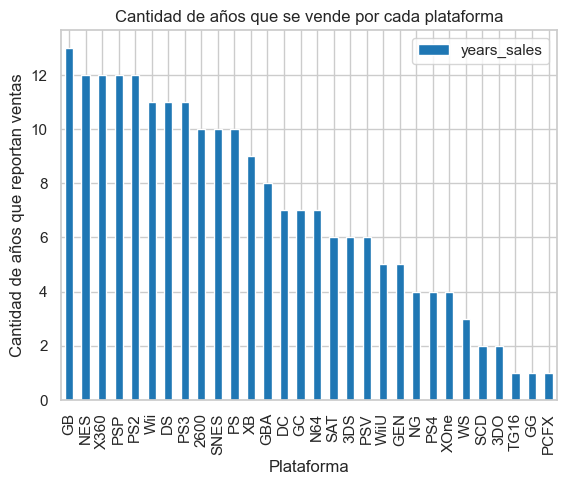

In [184]:
años_ventas.plot(kind='bar' ,x='platform' ,ylabel='Cantidad de años que reportan ventas' , xlabel='Plataforma',
                title='Cantidad de años que se vende por cada plataforma')

plt.show()

### Modelo para 2017 basado en la info recopilada

Patiendo de la base de lo ya analizado hay que tener en cuenta que la cantidad de juegos nuevos promedio de esta decada esta sobre los 500. Por otro lado vamos a tener en cuenta que una plataforma dura realizando ventas durante 7 años en promedio entonces vamos a tener que averiguar de las plataformas mas vendidas hasta ahora cuales salieron hace aproximadamente 5 años.

In [185]:
ultimos_7_años = df_games_data[(df_games_data['year_of_release']>2011) &
                              (df_games_data['year_of_release'] < 2016)]
                               

modelo_2017 = ultimos_7_años.groupby('platform').agg({'total_ventas':'sum',
                                            'year_of_release':'min'})

modelo_2017.sort_values(by='total_ventas',ascending=False)

#print('',modelo_2017['year_of_release'].dtype)

,total_ventas,year_of_release
platform,,
X360,166.0,2012
PS4,163.0,2013
PS3,152.0,2012
3DS,116.0,2012
XOne,94.0,2013
WiiU,44.0,2012
PC,28.0,2012
Wii,23.0,2012
DS,9.0,2012


In [186]:
modelo_2017_pivot = ultimos_7_años.pivot_table(index = 'platform' , columns ='year_of_release',values='total_ventas', aggfunc='sum')
modelo_2017_pivot

year_of_release,2012,2013,2014,2015
platform,,,,
3DS,28.0,41.0,30.0,17.0
DS,9.0,0.0,NaN,NaN
PC,14.0,6.0,5.0,3.0
PS3,61.0,66.0,21.0,4.0
PS4,NaN,20.0,65.0,78.0
PSP,0.0,0.0,0.0,0.0
PSV,3.0,0.0,2.0,0.0
Wii,15.0,6.0,2.0,0.0
WiiU,9.0,10.0,15.0,10.0


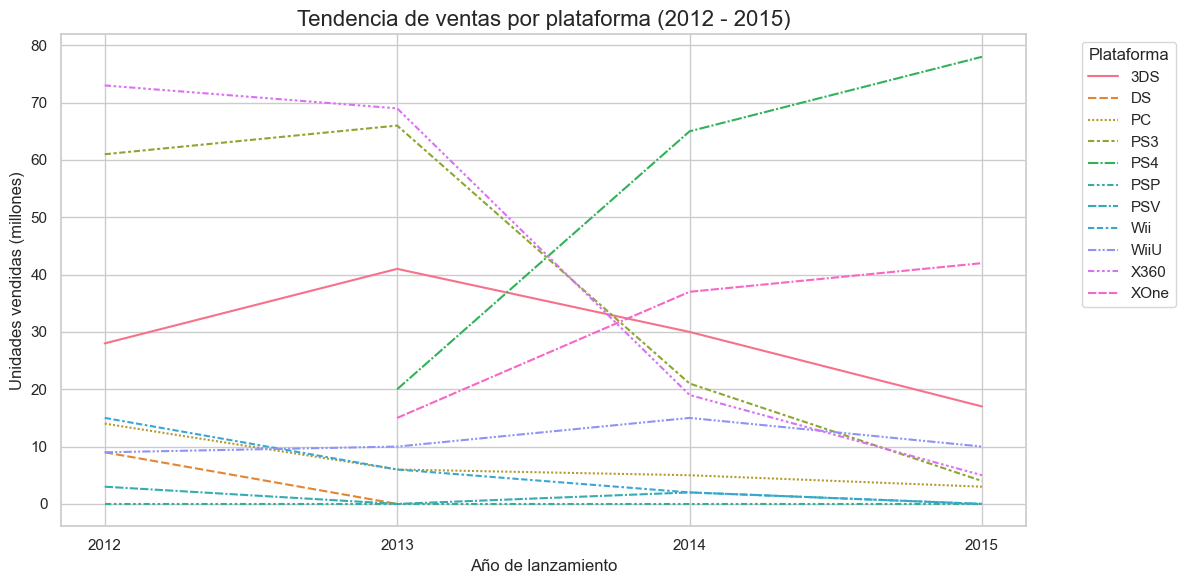

In [187]:
modelo_2017_pivot = modelo_2017_pivot.T

sns.set(style="whitegrid", palette="tab10")

plt.figure(figsize=(12, 6))
sns.lineplot(data=modelo_2017_pivot)

plt.title('Tendencia de ventas por plataforma (2012 - 2015)', fontsize=16)
plt.xlabel('Año de lanzamiento', fontsize=12)
plt.ylabel('Unidades vendidas (millones)', fontsize=12)

# Quitar decimales del eje X
plt.xticks(ticks=modelo_2017_pivot.index, labels=modelo_2017_pivot.index.astype(int))

plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


Estamos viendo el año en el que sacaron su primer juego para conocer desde cuando salio esta consola , se puede evidenciar el correcto analisis dado que PS2 en general es la consola que mas ah recaudado pero analizando este periodo podemos ver que durante los ultimos 7 años no ah vendido ningun juego.

Podemos ver como las ventas bajaron una posibilidad puede ser que no tengo todos los datos del 2016 sino solo una parte , es facil identificar en la grafica como PS3 y X360 van de salida bajando bastante sus ventas , mientras sus regens el PS4 y el XOne van al alza si despreciamos 2016 donde probablemente faltan datos. Otra posibilidad es que ya vaya a salir la siguiente genracion de consolas , para lo cual habría que investigar sobre este tema y marcaria que la vida util de esta generacion se vio acortada en comparacion a sus pares anteriores.

### Ventas globales según la plataforma

In [188]:
group_plat_ventas = df_games_data.groupby('platform')['total_ventas'].sum()
print(group_plat_ventas.head(30).sort_values(ascending=False))
print('\n ')

print('Promedio de ventas  $' , group_plat_ventas.mean().round(2),'millones de dolares')

platform
PS2     699.0
X360    674.0
Wii     607.0
PS3     541.0
DS      483.0
PS      453.0
GB      237.0
NES     230.0
PS4     201.0
PC      166.0
GBA     164.0
SNES    162.0
3DS     159.0
N64     158.0
XB      124.0
GC      106.0
PSP     100.0
2600     66.0
WiiU     45.0
GEN      23.0
SAT      11.0
DC        8.0
PSV       7.0
SCD       1.0
WS        1.0
3DO       0.0
PCFX      0.0
NG        0.0
GG        0.0
TG16      0.0
Name: total_ventas, dtype: float64

 
Promedio de ventas  $ 178.48 millones de dolares


<Axes: ylabel='total_ventas'>

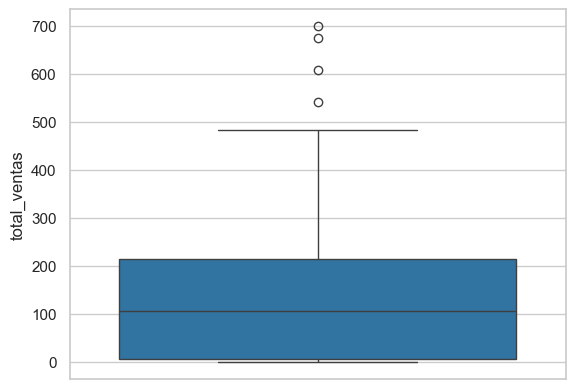

In [189]:
sns.boxplot( data=group_plat_ventas)

La media de las ventas por todas las plataformas es de 259 millones de dolares , se evidencia en el diagrama una gran cantidad de valores atipicos dado que hay plataformas que se salen de la media por mucho como la PS2 que registro ventas de juegos por mas de  1000 millones de dolares.

In [190]:
group_plat_prom = df_games_data.groupby('platform')['total_ventas'].mean()
print(group_plat_prom.head(30).sort_values(ascending=False))
print('\n ')

print('Promedio de ventas  $' , group_plat_prom.mean().round(2),'millones de dolares')

platform
GB      2.443299
NES     2.346939
GEN     0.851852
SNES    0.677824
2600    0.568966
X360    0.547078
PS4     0.512755
N64     0.500000
Wii     0.472006
PS3     0.414242
PS      0.380672
PS2     0.328632
3DS     0.310547
WiiU    0.306122
DS      0.227723
GBA     0.202219
GC      0.195572
PC      0.173459
WS      0.166667
SCD     0.166667
XB      0.154421
DC      0.153846
PSP     0.083822
SAT     0.063584
PSV     0.016317
TG16    0.000000
NG      0.000000
3DO     0.000000
PCFX    0.000000
GG      0.000000
Name: total_ventas, dtype: float64

 
Promedio de ventas  $ 0.41 millones de dolares


<Axes: ylabel='total_ventas'>

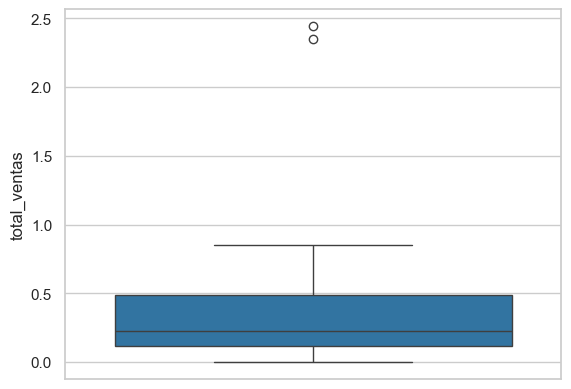

In [191]:
sns.boxplot( data=group_plat_prom)

Al evaluar los promedios lo que identificamos es el valor recaudad por juego en cada plataforma ya que cada fila contiene el un juego en promedio las plataformas mas conocidas como play station , xbox o nintendo . Podemos concluir que la calidad de los juegos de GB era muy alta con una demanda tal que en promedio alcanzaba el millon de dolares en venta por juego , tambien hay que ver que la gran cantidad de juegos que hay por consola actualmente genera que existan juegos con volumenes de ventas demasiado bajos.  Por otro lado podemos ver como los valores atipicos en el diagrama de caja son extremos , llegando a quintuplicar la media en los casos de GB y de NES (plataformas de nintendo) se evidencia la alta calidad por juego , donde prima la calidad del juego mas que la cantidad .

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular 

Vamos a evaluar el comportamiento de la PS4 dado que es el que mas ventas reporto en el 2016 , ademas de esto es una plataforma vigente que lleva unicamente 4 años en el mercado.

In [192]:
ps4_df = df_games_data[df_games_data['platform']=='PS4'].reset_index().sort_values(by='total_ventas' , ascending=False)


print('Ventas totales de la consola PS4 : $',ps4_df['total_ventas'].sum(),' millones de dolares')
print('Media de ventas : $',ps4_df['total_ventas'].mean().round(2),' millones de dolares')
print('Cantidad de juegos que saco',ps4_df['total_ventas'].count())
print('Valor medio de reseñas por parte de la critica', ps4_df['critic_score'].mean().round(1))
print('Valor medio de reseñas por parte de los usuarios', ps4_df['user_score'].mean().round(1))

print('----------------------------------------------------------------------------')
ps4_df.head(5)

Ventas totales de la consola PS4 : $ 201.0  millones de dolares
Media de ventas : $ 0.51  millones de dolares
Cantidad de juegos que saco 392
Valor medio de reseñas por parte de la critica 71.7
Valor medio de reseñas por parte de los usuarios 6.5
----------------------------------------------------------------------------


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
0,31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.0,6.0,0.0,2.0,71,7,RP,Pendiente,12.0
1,42,Grand Theft Auto V,PS4,2014,action,4.0,6.0,0.0,2.0,97,8,M,Maduro +17,10.0
2,77,FIFA 16,PS4,2015,sports,1.0,6.0,0.0,1.0,82,4,E,Todos,7.0
5,94,FIFA 17,PS4,2016,sports,1.0,6.0,0.0,1.0,85,5,E,Todos,7.0
3,87,Star Wars Battlefront (2015),PS4,2015,shooter,3.0,3.0,0.0,1.0,71,7,RP,Pendiente,6.0


Tenemos la informacion completa de la consola PS4 vemos lo que recauda por juego la media de las reseñas tanto de la critica como de los usuarios, tenemos el top 5 de juegos con mayor recaudacion , vamos a ver que tan correlacionados estan los datos , tanto para los usuarios como para la critica:

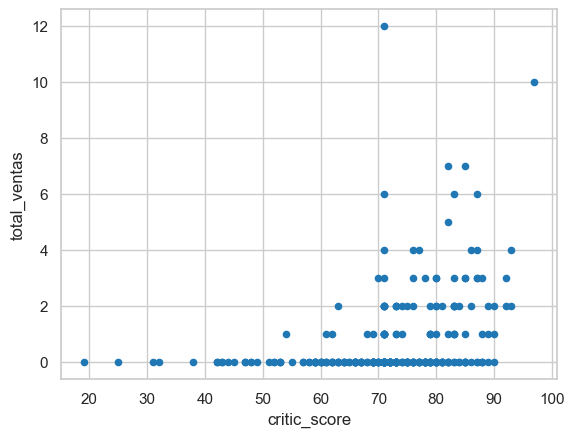

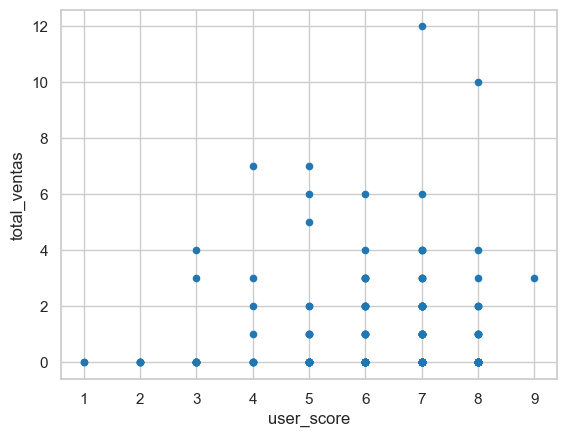

In [193]:
criticplot = ps4_df.plot(kind='scatter' , y='total_ventas' , x='critic_score')


userplot = ps4_df.plot(kind='scatter' , y='total_ventas' , x='user_score')

Podemos ver que la correlacion es mas importante en el caso de la valoracion de los criticos en donde obvservamos que a mayor calificacion de los criticos las ventas tienden a aumentar y en el caso de los juegos mas vendidos presentan un vlor promedio por parte de los criticos mayor a 70 puntos sobre 100 es importante aclarar que se saco la media de los datos para tratar lo nulos lo cual puede afianzar el valor medio de los mismos , con respecto a las calificaciones de los usuarios la tendencia no es clara para nada por el contrario la correlacion es negativa pero muy muy baja , por lo tanto a las perosnas les importan menos las calificaciones de otros usuarios en comparacion a las de los criticos.

### Comportamiento del top 5 de ventas de PS4 en otras plataformas

In [194]:
top_5_ps4 = ps4_df.head(5)
top_5_ps4_name = top_5_ps4['name'].reset_index()
top_5_ps4_name 

,index,name
0,0,Call of Duty: Black Ops 3
1,1,Grand Theft Auto V
2,2,FIFA 16
3,5,FIFA 17
4,3,Star Wars Battlefront (2015)


In [195]:
top_5_multiplataforma = df_games_data.merge(top_5_ps4_name  , on='name', how='right')
top_5_multiplataforma.drop(['index'], axis =1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
0,Call of Duty: Black Ops 3,PS4,2015,shooter,6.0,6.0,0.0,2.0,71,7,RP,Pendiente,12.0
1,Call of Duty: Black Ops 3,XOne,2015,shooter,5.0,2.0,0.0,1.0,71,7,RP,Pendiente,7.0
2,Call of Duty: Black Ops 3,X360,2015,shooter,1.0,0.0,0.0,0.0,71,7,RP,Pendiente,1.0
3,Call of Duty: Black Ops 3,PS3,2015,shooter,0.0,1.0,0.0,0.0,71,7,RP,Pendiente,1.0
4,Call of Duty: Black Ops 3,PC,2015,shooter,0.0,0.0,0.0,0.0,71,7,RP,Pendiente,0.0
5,Grand Theft Auto V,PS3,2013,action,7.0,9.0,1.0,4.0,97,8,M,Maduro +17,17.0
6,Grand Theft Auto V,X360,2013,action,10.0,5.0,0.0,1.0,97,8,M,Maduro +17,15.0
7,Grand Theft Auto V,PS4,2014,action,4.0,6.0,0.0,2.0,97,8,M,Maduro +17,10.0
8,Grand Theft Auto V,XOne,2014,action,3.0,2.0,0.0,0.0,97,7,M,Maduro +17,5.0
9,Grand Theft Auto V,PC,2015,action,0.0,1.0,0.0,0.0,96,7,M,Maduro +17,1.0


Como primer punto se evidencia que importa mucho el año de lanzamiento del juego y de la consola dado que la mejora y la optimizacion de las consolas hacen que un juego vaya mejor o peor , como primer punto se ve que ninguno de los juegos que hacen parte del top 5 son unicos de la consola todos tienen multiplataforma , otra cosa que es evidente es la relacion con su competidor directo XOne , otro punto a tener en cuenta es el de los FIFA estos juegos cambian de version cada año por lo cual no es aconsejable tener gran cantidad de la versiona pasada en este caso el FIFA 16 es mas aconsejable tener mayor volumen de FIFA17 asi este no hay sido el mas vendido dado que no se tiene toda la info del año , por otro lado se ve como GTAV fue un juego que salio antes de que saliera en el PS4 este juego se actualiza con la consola por lo cual a futuro y viendo su volumen y proyeccion de ventas es importante tener bastantes unidades de este juego ya que es el que mas ah reacaudado en general.

### Comportamiento de los juegos segun su genero

In [196]:
df_games_data.head(20).sort_values(by='total_ventas', ascending= False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
0,Wii Sports,Wii,2006,sports,41.0,29.0,4.0,8.0,76,8,E,Todos,74.0
1,Super Mario Bros.,NES,1985,platform,29.0,4.0,7.0,1.0,71,7,RP,Pendiente,40.0
2,Mario Kart Wii,Wii,2008,racing,16.0,13.0,4.0,3.0,82,8,E,Todos,33.0
3,Wii Sports Resort,Wii,2009,sports,16.0,11.0,3.0,3.0,80,8,E,Todos,30.0
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.0,9.0,10.0,1.0,71,7,RP,Pendiente,30.0
5,Tetris,GB,1989,puzzle,23.0,2.0,4.0,1.0,71,7,RP,Pendiente,29.0
9,Duck Hunt,NES,1984,shooter,27.0,1.0,0.0,0.0,71,7,RP,Pendiente,28.0
6,New Super Mario Bros.,DS,2006,platform,11.0,9.0,6.0,3.0,89,8,E,Todos,26.0
7,Wii Play,Wii,2006,misc,14.0,9.0,3.0,3.0,58,6,E,Todos,26.0
8,New Super Mario Bros. Wii,Wii,2009,platform,14.0,7.0,5.0,2.0,87,8,E,Todos,26.0


In [197]:
genero =  df_games_data.groupby('genre').agg({'total_ventas':'sum',
                                             'name' : 'count',
                                             'critic_score':'mean'})


genero_def = genero.rename(columns ={'name':'cant_juegos','critic_score':'critic_mean'
                       })

genero_def['critic_mean'] = genero_def['critic_mean'].round(0)

genero_def['ganancias_juego'] = genero_def['total_ventas'] /  genero_def['cant_juegos'] 

genero_def = genero_def.sort_values(by='total_ventas')
genero_def

,total_ventas,cant_juegos,critic_mean,ganancias_juego
genre,,,,
strategy,84.0,673,72.0,0.124814
adventure,97.0,1293,70.0,0.075019
puzzle,159.0,569,70.0,0.279438
simulation,239.0,857,70.0,0.278880
fighting,249.0,837,70.0,0.297491
racing,460.0,1226,69.0,0.375204
misc,471.0,1721,70.0,0.273678
platform,626.0,878,69.0,0.712984
role-playing,635.0,1481,72.0,0.428764


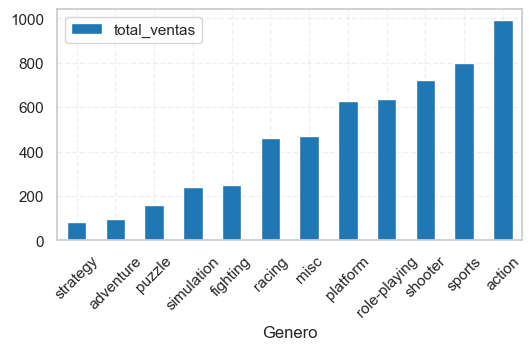

In [198]:
genero_def.plot(kind='bar' , y='total_ventas' , figsize =(6,3) )


plt.xlabel('Genero')
plt.xticks(rotation = 45)
plt.grid(alpha = 0.3 ,linestyle = '--')
plt.show()

Como podemos evidenciar los juegos mas vendidos son de accion , deportes y disparos .
Vamos a hacer un analisis detenido segun el genero iniciando por los juegos de accion:

In [199]:
df_by_action = df_games_data[df_games_data['genre']=='action'].sort_values(by='total_ventas' , ascending = False)
df_by_action['total_ventas'].sum().round(2)
df_by_action.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
16,Grand Theft Auto V,PS3,2013,action,7.0,9.0,1.0,4.0,97,8,M,Maduro +17,17.0
23,Grand Theft Auto V,X360,2013,action,10.0,5.0,0.0,1.0,97,8,M,Maduro +17,15.0
24,Grand Theft Auto: Vice City,PS2,2002,action,8.0,5.0,0.0,2.0,95,8,M,Maduro +17,13.0
38,Grand Theft Auto III,PS2,2001,action,7.0,5.0,0.0,1.0,97,8,M,Maduro +17,12.0
46,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,action,4.0,3.0,4.0,1.0,71,7,RP,Pendiente,11.0


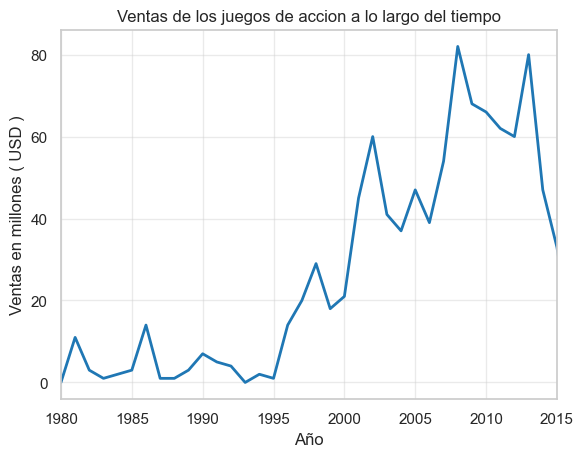

In [200]:

g_action = df_by_action.groupby('year_of_release')['total_ventas'].sum()
sns.lineplot(data= g_action , linewidth = 2 )


plt.xlim(1980,2015)
plt.title('Ventas de los juegos de accion a lo largo del tiempo')
plt.ylabel('Ventas en millones ( USD )')
plt.grid(alpha = 0.4)
plt.xlabel('Año')

plt.show()

Estos analisis especificos afianzan lo ya analisado , en este caso es claramente visible como dos juegos de PS2 se encuentran en el top de los mas vendidos por genero razon por la cual es la consola que mas ah vendido en la historia hasta el momento , por otro lado resalta la importancia de la saga de juegos de Gran Theft Auto , la cual mantiene su atraccion por el publico a lo largo del tiempo ya que su primera entrega del top salió en el año 2001 , por lo cual se recomienda siempre tener la ultima entrega de este juego disponible , ya que es bastante rentable y apetecido por los usuarios.

In [201]:
df_by_sports = df_games_data[df_games_data['genre']=='sports'].sort_values(by='total_ventas' , ascending = False)
df_by_sports['total_ventas'].sum().round(2)
df_by_sports.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
0,Wii Sports,Wii,2006,sports,41.0,29.0,4.0,8.0,76,8,E,Todos,74.0
3,Wii Sports Resort,Wii,2009,sports,16.0,11.0,3.0,3.0,80,8,E,Todos,30.0
13,Wii Fit,Wii,2007,sports,9.0,8.0,4.0,2.0,80,7,E,Todos,21.0
15,Wii Fit Plus,Wii,2009,sports,9.0,8.0,3.0,2.0,80,7,E,Todos,20.0
86,Mario & Sonic at the Olympic Games,Wii,2007,sports,3.0,4.0,1.0,1.0,71,7,RP,Pendiente,8.0


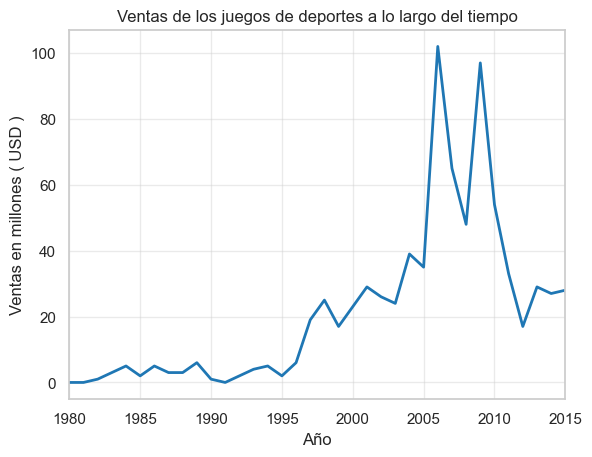

In [202]:
g_sport = df_by_sports.groupby('year_of_release')['total_ventas'].sum()
sns.lineplot(data= g_sport , linewidth = 2 )


plt.xlim(1980,2015)
plt.title('Ventas de los juegos de deportes a lo largo del tiempo')
plt.ylabel('Ventas en millones ( USD )')
plt.grid(alpha = 0.4)
plt.xlabel('Año')

plt.show()

En este caso se afianza lo antes descrito , se evidencia como Wii de la compañia nintendo arraza en este secto pero apesar de esto hoy en dia no esta entre las plataformas mas consumidas en esre caso podemos ver que las ventas de sus titulos top se dieron en la primera decada de los 2000 .

Este comportamiento es bastante similar al de las consolas Wii de nintendo , por lo cual se evidencia la relacion de las mismas habria que evaluar el comportamiento de los juegos de fifa que son los siguientes mas populares para ver si son un poco mas constantes:

In [203]:
by_fifa = df_by_sports[df_by_sports['name'].str.contains("FIFA")]
by_fifa.sort_values(by='total_ventas' , ascending =False)

by_fifa = by_fifa.groupby('name')['total_ventas'].sum().reset_index()
by_fifa.sort_values(by='total_ventas' , ascending = False).head(10)

,name,total_ventas
7,FIFA 15,14.0
8,FIFA 16,14.0
6,FIFA 14,13.0
9,FIFA 17,10.0
22,FIFA Soccer 11,9.0
5,FIFA 12,9.0
21,FIFA Soccer 10,8.0
18,FIFA Soccer 08,6.0
19,FIFA Soccer 09,4.0
27,FIFA Soccer 2005,4.0


Como se esperaba son mas o menos constantes a lo largo del tiempo a comparacion de los juegos de Wii que tuvieron un pick de demanda alto pero no tan prolongado.

In [204]:
df_by_shoot = df_games_data[df_games_data['genre']=='shooter'].sort_values(by='total_ventas' , ascending = False)
df_by_shoot['total_ventas'].sum().round(2)
df_by_shoot.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,publico,total_ventas
9,Duck Hunt,NES,1984,shooter,27.0,1.0,0.0,0.0,71,7,RP,Pendiente,28.0
32,Call of Duty: Black Ops,X360,2010,shooter,10.0,4.0,0.0,1.0,87,6,M,Maduro +17,14.0
36,Call of Duty: Modern Warfare 2,X360,2009,shooter,9.0,4.0,0.0,1.0,94,6,M,Maduro +17,13.0
29,Call of Duty: Modern Warfare 3,X360,2011,shooter,9.0,4.0,0.0,1.0,88,3,M,Maduro +17,13.0
34,Call of Duty: Black Ops II,PS3,2012,shooter,5.0,6.0,1.0,2.0,83,5,M,Maduro +17,12.0
35,Call of Duty: Black Ops II,X360,2012,shooter,8.0,4.0,0.0,1.0,83,4,M,Maduro +17,12.0
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.0,6.0,0.0,2.0,71,7,RP,Pendiente,12.0
37,Call of Duty: Modern Warfare 3,PS3,2011,shooter,6.0,6.0,0.0,2.0,88,3,M,Maduro +17,12.0
44,Halo 3,X360,2007,shooter,8.0,3.0,0.0,1.0,94,7,M,Maduro +17,11.0
41,Call of Duty: Black Ops,PS3,2010,shooter,6.0,4.0,0.0,2.0,88,6,M,Maduro +17,10.0


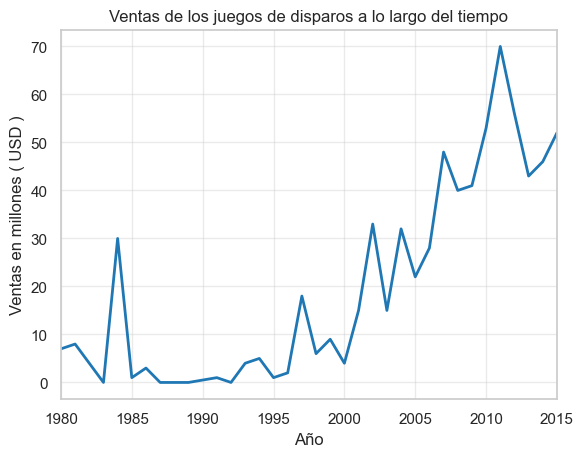

In [205]:
g_shoot = df_by_shoot.groupby('year_of_release')['total_ventas'].sum()
sns.lineplot(data= g_shoot , linewidth = 2 )


plt.xlim(1980,2015)
plt.title('Ventas de los juegos de disparos a lo largo del tiempo')
plt.ylabel('Ventas en millones ( USD )')
plt.grid(alpha = 0.4)
plt.xlabel('Año')

plt.show()

Este comportamiento ah sido el mas constante de los analizados y el unico que va al alza por lo cual es importante mantener stock de este tipo de juegos los cuales tienen COD como bandera de igual manera que GTA la genta sabe que es sinonimo de calidad y esperan por este titulo identificando que a lo largo del tiempo cambia la plataforma pero los usuarios consumen la siguente entrega.

## Crear un perfil de usuario por region

In [206]:
ventas_eu = df_games_data['eu_sales'].sum().round(2)
ventas_jp = df_games_data['jp_sales'].sum().round(2)
ventas_na = df_games_data['na_sales'].sum().round(2)

print('Ventas totales en europa: $', ventas_eu ,'millones de dolares')
print('Ventas totales en japon: $', ventas_jp ,'millones de dolares')
print('Ventas totales en norte america: $', ventas_na ,'millones de dolares')

print('\n')
print('Ventas totales: $', ventas_eu + ventas_jp + ventas_na ,'millones de dolares')



Ventas totales en europa: $ 1566.0 millones de dolares
Ventas totales en japon: $ 796.0 millones de dolares
Ventas totales en norte america: $ 3171.0 millones de dolares


Ventas totales: $ 5533.0 millones de dolares


In [207]:
print('Ventas totales en norte america porcentualmente: %', round((ventas_na/(ventas_eu + ventas_jp + ventas_na)*100),2))
print('Ventas totales en europa porcentualmente: %', round((ventas_eu/(ventas_eu + ventas_jp + ventas_na)*100),2))
print('Ventas totales en japon porcentualmente: %', round((ventas_jp/(ventas_eu + ventas_jp + ventas_na)*100),2))

Ventas totales en norte america porcentualmente: % 57.31
Ventas totales en europa porcentualmente: % 28.3
Ventas totales en japon porcentualmente: % 14.39


Antes de adentrarnos en el analisis hay que tener en cuenta que el mercado mas fuerte es el de NA dominando el %54.05 del mercado lo cual le da mayor peso a esta region.

###  Region NA

In [208]:
df_NA = df_games_data.drop(['eu_sales','jp_sales','other_sales','total_ventas'], axis=1)
df_NA

,name,platform,year_of_release,genre,na_sales,critic_score,user_score,rating,publico
0,Wii Sports,Wii,2006,sports,41.0,76,8,E,Todos
1,Super Mario Bros.,NES,1985,platform,29.0,71,7,RP,Pendiente
2,Mario Kart Wii,Wii,2008,racing,16.0,82,8,E,Todos
3,Wii Sports Resort,Wii,2009,sports,16.0,80,8,E,Todos
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.0,71,7,RP,Pendiente
...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,action,0.0,71,7,RP,Pendiente
16440,LMA Manager 2007,X360,2006,sports,0.0,71,7,RP,Pendiente
16441,Haitaka no Psychedelica,PSV,2016,adventure,0.0,71,7,RP,Pendiente
16442,Spirits & Spells,GBA,2003,platform,0.0,71,7,RP,Pendiente


In [209]:
NA_top5 = df_NA.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales' , ascending = False)
NA_top5 = NA_top5.head(5)

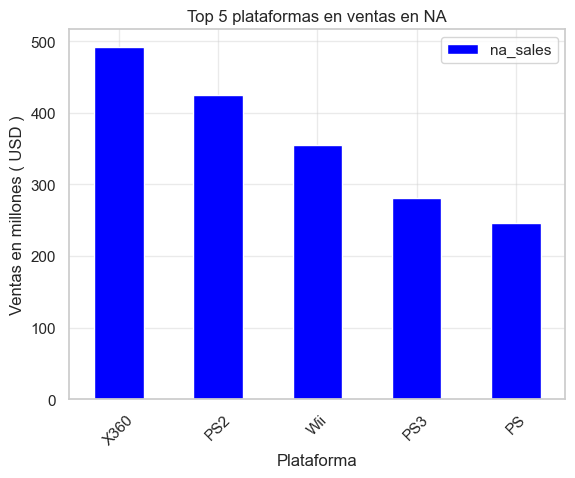

In [210]:
NA_top5.plot(kind='bar',x='platform', y='na_sales', color='blue')
plt.title('Top 5 plataformas en ventas en NA')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

In [211]:
NA_genre_top = df_NA.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales' ,ascending = False)
NA_genre_top =NA_genre_top.head(5)

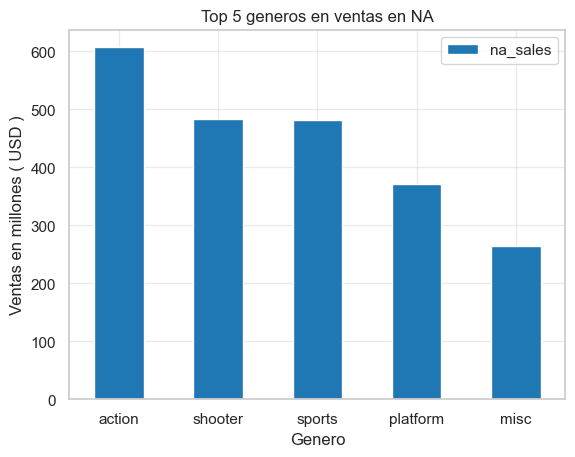

In [212]:
NA_genre_top.plot(kind='bar',x='genre', y='na_sales')
plt.title('Top 5 generos en ventas en NA')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Genero')
plt.xticks(rotation=0)
plt.grid(alpha=0.4)
plt.show()

In [213]:
#NA_rating_top = df_NA.groupby(['publico'])['na_sales'].sum().reset_index().sort_values('na_sales' ,ascending = False)

NA_rating_top = df_NA.groupby('publico').agg({'na_sales':'sum',
                                             'name':'count'})


NA_rating_top = NA_rating_top.rename(columns ={'na_sales':'sales_na',
                              'name':'cant_juegos'})

NA_rating_top =NA_rating_top.head(10).sort_values(by='sales_na' , ascending= False).reset_index()

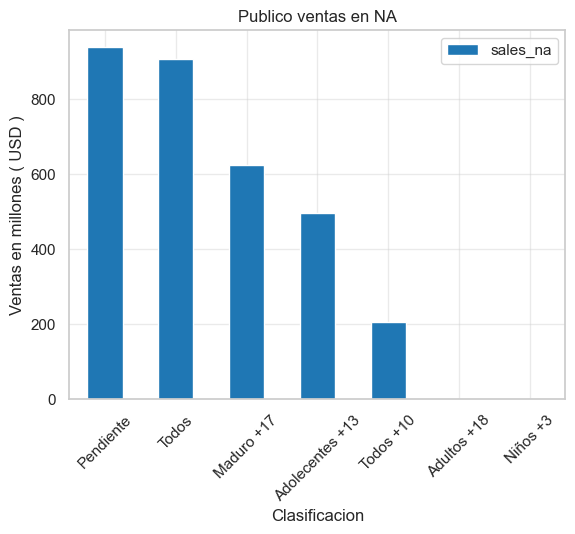

In [214]:
NA_rating_top.plot(kind='bar',x='publico', y='sales_na')
plt.title('Publico ventas en NA')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Clasificacion')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

La plataforma mas fuerte en Norte america es Xbox con la plataforma X360 , muy de cerca esta PS2 esto teniendo en cuenta las ventas , en cuanato a la siguiente generacion ya se asoma el PS3 pero no esta el Xone por lo tanto hay una posibilidad de que en esa generacion PS supere a Xbos en esta zona , en cuanto a los generos renta mas vender en na juegos de accion este genero practicamente dobla al valor de ventas del tercer genero que es shooter en cuanto al segundo genero sports es congruente al comportamiento de la tercera plataforma mas fuere (Wii) con su linea de wii sports de la cual ya analizamos que paso su epoca , por otro lado en esta parte del mundo hay un sesgo frente al publico los juegos mas vendidos son los que tiene clasificacion para todos esto tiene sentido ya que tienen un publico mas amplio , por otro lado es necesario completar la informacion de los juegos que no tienen el publico que lo tienen en pendiente ya que este publico representa el segundo publico mas vendido , en teoria estas cantidades se deben dividir entre las otras por lo cual la informacion no es muy fiable .

### Region EU

In [215]:
df_EU = df_games_data.drop(['na_sales','jp_sales','other_sales','total_ventas'], axis=1)
df_EU.head(5)

,name,platform,year_of_release,genre,eu_sales,critic_score,user_score,rating,publico
0,Wii Sports,Wii,2006,sports,29.0,76,8,E,Todos
1,Super Mario Bros.,NES,1985,platform,4.0,71,7,RP,Pendiente
2,Mario Kart Wii,Wii,2008,racing,13.0,82,8,E,Todos
3,Wii Sports Resort,Wii,2009,sports,11.0,80,8,E,Todos
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,9.0,71,7,RP,Pendiente


In [216]:
EU_top5 = df_EU.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales' , ascending = False)
EU_top5 = EU_top5.head(5)

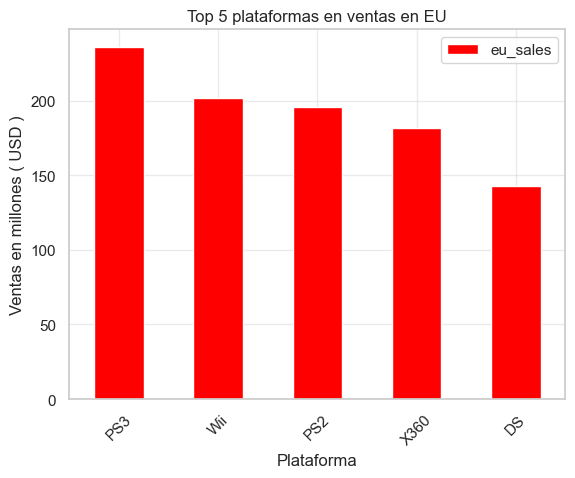

In [217]:
EU_top5.plot(kind='bar',x='platform', y='eu_sales', color='red')
plt.title('Top 5 plataformas en ventas en EU')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Plataforma')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

In [218]:
EU_genre_top = df_EU.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales' ,ascending = False)
EU_genre_top = EU_genre_top.head(5)

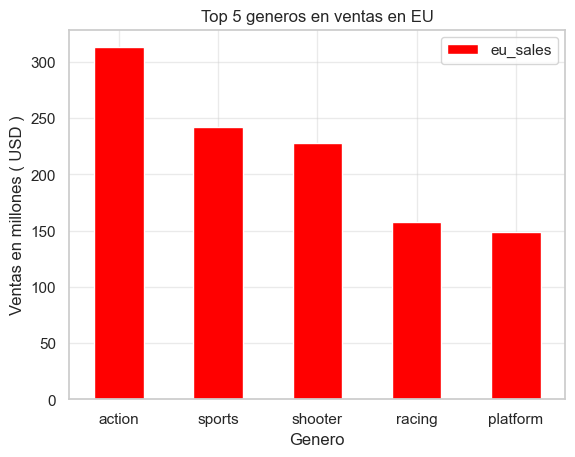

In [219]:
EU_genre_top.plot(kind='bar',x='genre', y='eu_sales',color='red')
plt.title('Top 5 generos en ventas en EU')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Genero')
plt.xticks(rotation=0)
plt.grid(alpha=0.4)
plt.show()

In [220]:
EU_rating_top = df_EU.groupby('publico').agg({'eu_sales':'sum',
                                             'name':'count'})


EU_rating_top = EU_rating_top.rename(columns ={'eu_sales':'sales_eu',
                              'name':'cant_juegos'})

EU_rating_top = EU_rating_top.head(10).sort_values(by='sales_eu' , ascending= False).reset_index()
EU_rating_top

,publico,sales_eu,cant_juegos
0,Todos,494.0,3924
1,Pendiente,377.0,6677
2,Maduro +17,368.0,1536
3,Adolecentes +13,232.0,2905
4,Todos +10,94.0,1393
5,Adultos +18,1.0,1
6,Niños +3,0.0,8


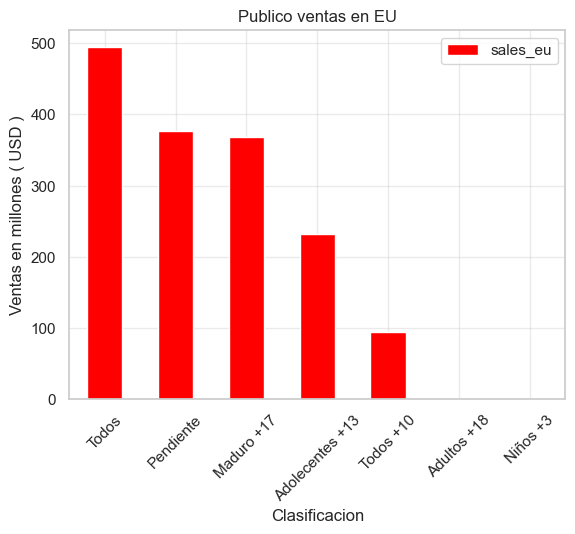

In [221]:
EU_rating_top.plot(kind='bar',x='publico', y='sales_eu',color='red')
plt.title('Publico ventas en EU')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Clasificacion')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

En Europa el comportamiento es ligeramente distinto a Na en este caso la plataforma ampliamente predominantes es la PS3 , se dice ampliamente dado que ya paso lo numero de su antecesora la PS2 y aún le quedan varios años en el mercado , ademas no esta por asomo su competidor en na que es la Xone , en cuanto a los generos el comportamiento es similar pero las diferencias entre los generos es amplia entre el primer y el segundo lugar con accion mientras entre el segundo lugar que es sport y el tercero que es shooters la diferencia es mas corta , pero evidenciamos un comportamiento muy similar al de na , de igual manera en los publicos resaltando lo mismo es importante completar la informacion pendiente ya que es demasiado significativa.

### Region JP

In [222]:
df_JP = df_games_data.drop(['na_sales','eu_sales','other_sales','total_ventas'], axis=1)
df_JP.head(5)

,name,platform,year_of_release,genre,jp_sales,critic_score,user_score,rating,publico
0,Wii Sports,Wii,2006,sports,4.0,76,8,E,Todos
1,Super Mario Bros.,NES,1985,platform,7.0,71,7,RP,Pendiente
2,Mario Kart Wii,Wii,2008,racing,4.0,82,8,E,Todos
3,Wii Sports Resort,Wii,2009,sports,3.0,80,8,E,Todos
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,10.0,71,7,RP,Pendiente


In [223]:
JP_top5 = df_JP.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales' , ascending = False)
JP_top5 = JP_top5.head(5)

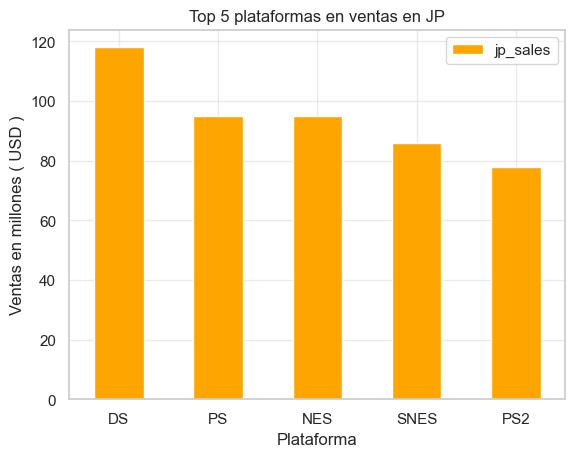

In [224]:
JP_top5.plot(kind='bar',x='platform', y='jp_sales', color='orange')
plt.title('Top 5 plataformas en ventas en JP')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Plataforma')
plt.xticks(rotation=0)
plt.grid(alpha=0.4)
plt.show()

In [225]:
JP_genre_top = df_JP.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales' ,ascending = False)
JP_genre_top = JP_genre_top.head(5)

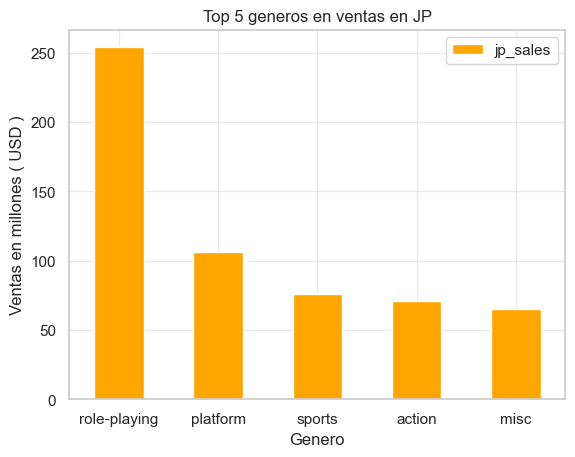

In [226]:
JP_genre_top.plot(kind='bar',x='genre', y='jp_sales',color='orange')
plt.title('Top 5 generos en ventas en JP')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Genero')
plt.xticks(rotation=0)
plt.grid(alpha=0.4)
plt.show()

In [227]:
JP_rating_top = df_JP.groupby('publico').agg({'jp_sales':'sum',
                                             'name':'count'})


JP_rating_top = JP_rating_top.rename(columns ={'jp_sales':'sales_jp',
                              'name':'cant_juegos'})

JP_rating_top= JP_rating_top.head(10).sort_values(by='sales_jp' , ascending= False).reset_index()


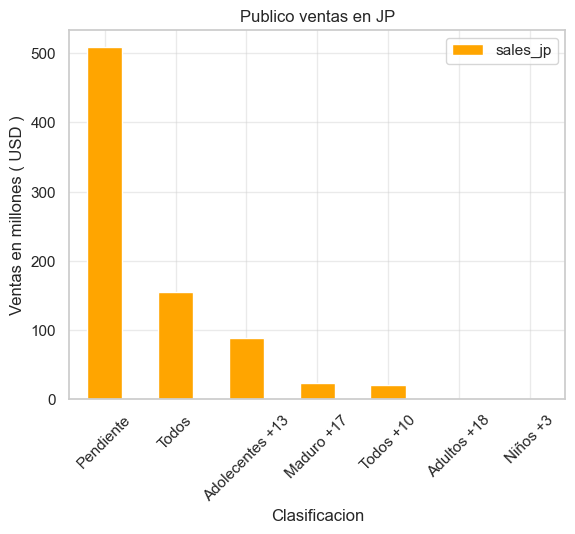

In [229]:
JP_rating_top.plot(kind='bar',x='publico', y='sales_jp',color='orange')
plt.title('Publico ventas en JP')
plt.ylabel('Ventas en millones ( USD )')
plt.xlabel('Clasificacion')
plt.xticks(rotation=45)
plt.grid(alpha=0.4)
plt.show()

Se evalua el comportamiento del publico de japon a pesar de que este publico es el que genera menor peso porcentual con el 16% de las ventas , se encuentra que el target de japon son las plataformas de nintendo donde el top 5 es de esta compañia , por lo cual el genero tambien cambio mostrando roleplay como el mas fuerte seguido por los de acción , llama la atencion como no compran juegos shooters en esta parte del mundo se evidencia un mercado muy diferente al occidenatal , con respecto al publico se deja la misma notacion es vital para estos analisis que se agreguen en los datos los publicos dado que el mas importante en este caso fue el de los Pendientes , cuadruplicando la cantidad del segundo que es TODOS , por esto se evita analizar estos datos y se deja la novedad de completar la información.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Juan has logrado identificar claramente las diferencias entre América del Norte, Europa y Japón, no solo en términos de plataformas y géneros predominantes, sino también en la influencia de las clasificaciones ESRB, lo que refleja tu capacidad para conectar datos con tendencias culturales y de comportamiento. 
    

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


    
Aunque los valores son correctos, recuerda que los seres humanos somos principalmente visuales. Por lo tanto, cuando manejes este tipo de información, una buena práctica es acompañarla de una gráfica. Esto facilita el estudio y el análisis de los datos.
    

</div>    
    

</div>

## Prueba las siguientes hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [93]:
from scipy import stats as  st

In [94]:
PC = df_games_data[df_games_data['platform']=='PC']
pc =  PC['user_score']

Xone = df_games_data[df_games_data['platform']=='XOne']
xone = Xone['user_score']


print('Promedio calificacion users para Xone:' , xone.mean().round(2))

print('Promedio calificacion users para PC:' , pc.mean().round(2))

print('\n' ,'-------------------------------')
print('\n')


alpha = .05

result = st.ttest_ind(pc , xone)

print('Valor p:' ,result.pvalue)

if result.pvalue > alpha:
    print ('Rechazamos hipotesis nula')
    
else:
    print ('No hay evidencia para rechazar la hipotesis')


Promedio calificacion users para Xone: 6.34
Promedio calificacion users para PC: 6.69

 -------------------------------


Valor p: 0.00038728736479470523
No hay evidencia para rechazar la hipotesis


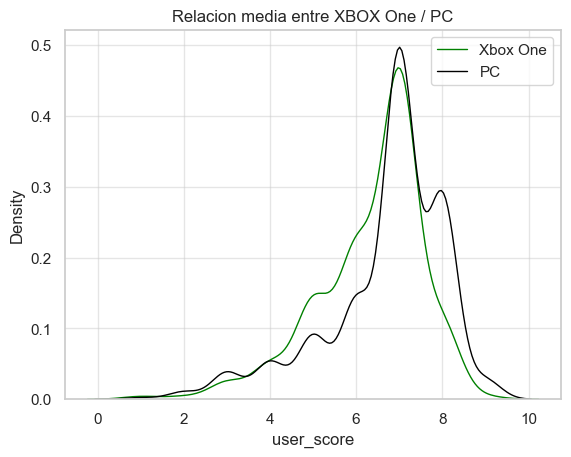

In [95]:
xone_g = sns.kdeplot(xone, color='green', linewidth=1 , label='Xbox One' )
pc_g = sns.kdeplot(pc, color='black', linewidth=1, label='PC')

plt.legend()
plt.grid(alpha = 0.5)
plt.title('Relacion media entre XBOX One / PC')
plt.show()

Dado que los promedios son similares no hay evidencia suficiente para rechazar la hipotesis de que las calificaciones promedio entre los usuarios frente a el Xbox one y el PC son similares , en la grafica podemos evidenciar su similitud. Esto tambien se puede atribuir a que para los valores faltantes de estas calificaciones se uso la mediana lo cual genera que los datos entre si esten mas relacionados.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [96]:
accion = df_games_data[df_games_data['genre']=='action']
Accion = accion['user_score']

sport = df_games_data[df_games_data['genre']=='sports']
Sport = sport['user_score']


print('Promedio calificacion users para accion:' , Accion.mean().round(2))

print('Promedio calificacion users para deportes:' , Sport.mean().round(2))

print('\n' ,'-------------------------------')
print('\n')


alpha = .05

result = st.ttest_ind(Sport , Accion)

print('Valor p:' ,result.pvalue)

if  result.pvalue < alpha:
    print ('Rechazamos hipotesis nula')
    
else:
    print ('No hay evidencia para rechazar la hipotesis')

Promedio calificacion users para accion: 6.79
Promedio calificacion users para deportes: 6.76

 -------------------------------


Valor p: 0.2922359945476182
No hay evidencia para rechazar la hipotesis


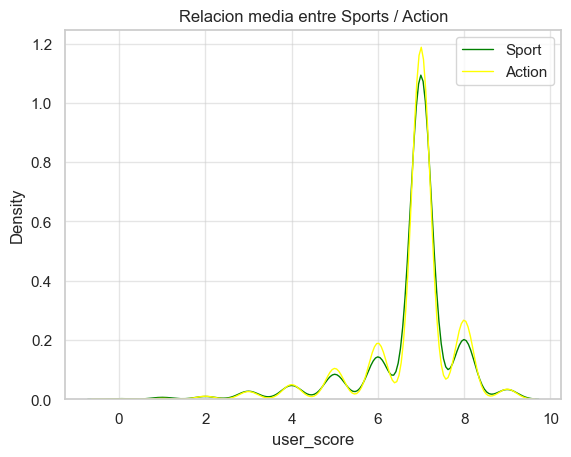

In [97]:
sport_g = sns.kdeplot(Sport, color='green', linewidth=1 , label='Sport' )
action_g = sns.kdeplot(Accion, color='yellow', linewidth=1, label='Action')

plt.legend()
plt.grid(alpha = 0.5)
plt.title('Relacion media entre Sports / Action')
plt.show()

Dado que los promedios son similares no hay evidencia suficiente para aceptar la hipotesis de que las calificaciones promedio entre los usuarios frente a los generos de accion y de deportes sean diferentes , en la grafica podemos evidenciar su falta de diferencia. Esto tambien se puede atribuir a que para los valores faltantes de estas calificaciones se uso la mediana lo cual genera que los datos entre si esten mas relacionados.

## CONCLUSION GENERAL

Como colcusion general se recomienda mantener un Stock fuerte en juegos de PS4 y de Xbox one ya que son las consolas que estan en tendencia y se estima que durarán registrando ventas en el mercados al menos durante 3 o 4 años mas dado que el timepo que dura una consola en tendencia esta entre lo 7 a 8 años , de igual manera es clave realizar este sondeo periodicamente ya que se establecio que mas o menos cada decada puede cambiar la tendencia de la plataforma con mas ventas , como se vio en la primera decada de los 2000 en donde nintendo era el líder y rapidamente quedo relegado .

Por otro lado es importante estar actualizado frente a la critica de los vieojuegos por parte de los expertos en este sentido ya que se establecio que esta valoración tiende a influir en las deciciones de los consumidores para comprar videojuegos nuevos , con la globalizacion es importante generar una manera en la cual se puedan hacer campañas de marketing con influencers para aumentar el mercado , ademas se recomienda estar atento a que juegos se incluyen entre los Esports , ya que atraen popularidad de una manera bastante veloz actualmente .

En cuanto a los generos en tendencia se ve como franquicias como  call of dutty o GTA , siguen vigentes y sus generos en tendencia en general , es clave mantener buen stock de estos juegos mas teniendo en cuenta que hoy en día los mismos juegos reciben actualizaciones por lo tanto van a tender a ser mas longebos , en cuanto a los shooters se ve un alza en la tendencia de los mismos en parte gracias a que ahora existe la posibilidad de competir con mas personas y de jugar con tus amigos por tanto hay que estar atentos a que nuevos titulos nos depara esta categoria.


Evaluar por regiones los perfiles de los usuarios nos brinda la posibildad de saber que buscan zonalmente , el comportamiento de europa y norte america es demasiado similar evidenciando que les gustan mucho los juegos de accion y de deportes con la salvedad de que en norte america tienden a tener mayor consumo las consolas de xbox , cuando en europa el rey es play station.
Lo que respecta al mercado japones , se encuentran factores sociales en su cultura que genera que primen juegos muy distintos y que el consumo de los mimsos sea menor mostrando una clara tendencia a los juegos de nintendo en el genero role player.
En los tres casos es importante marcar el comentario de que es imperativo que completen la informacion de para que publico es el juego dado que en su mayoria hay faltantes lo que genera un sesgo importante en la informacion impidiendo que la informacion analizada tenga el peso que deberia.


-

